# __BANKRUPTCY PREVENTION__

## Binary Classification Task

# TOPICS: <a id="home"></a>
- [Exploratary Data Analysis](#eda)<br>
- [Model Building](#Model)<br>
- [Model Deplpyment](#deploy)<br>

# EDA <a id="eda"></a>

# CONTENTS 
[1.Importing Libraries and Reading File](#1)<br>
[2.Checking for Missing values](#2)<br>
[3.Checking for Correlation](#3)<br>
[4.pandas.Crosstab](#6)<br>
[5.Distribution Plot](#4)<br>
[6.Violin and Strip Plot](#12)<br>
[7.Line Plot](#5)<br>
[8.Histogram plots](#7)<br>
[9.Density Estimate Plots](#8)<br>
[10.Grouped Bar Charts using sns.catplot](#9)<br>
[11.Stacked Bar Charts](#10)<br>
[12.Conclution](#11)


### Importing Libraries and Reading the file  <a id="1"></a>

In [128]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.stats import spearmanr,kendalltau

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import rcParams

In [129]:
data=pd.read_csv("A:\\Data Science by Excelr\\PROJECT\\bankruptcy_prevention.csv",sep=";")

In [130]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [131]:
data.sample(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
101,1.0,1.0,0.0,0.5,0.0,1.0,bankruptcy
215,0.0,0.0,0.5,0.5,0.5,0.0,non-bankruptcy
80,0.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
52,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
158,0.5,1.0,0.5,0.5,1.0,0.0,non-bankruptcy


### Checking For Null Values:  <a id="2"></a>

In [132]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [134]:
data.shape

(250, 7)

In [135]:
data.describe(include="all")

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,non-bankruptcy
freq,NaN,NaN,NaN,NaN,NaN,NaN,143
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,NaN
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,NaN


In [136]:
data1=data

### Renaming column to avoid errors

In [137]:
data1=data1.rename(columns = {data.columns[6]: 'class_value'})
data1=data1.rename(columns = {data.columns[5]: 'operating_risk'})
data1=data1.rename(columns = {data.columns[4]: 'competitiveness'})
data1=data1.rename(columns = {data.columns[3]: 'credibility'})
data1=data1.rename(columns = {data.columns[2]: 'financial_flexibility'})
data1=data1.rename(columns = {data.columns[1]: 'management_risk'})

In [138]:
data1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [139]:
label_encoder = preprocessing.LabelEncoder()
data1["class_value"] = label_encoder.fit_transform(data1["class_value"])

### Checking for Correlation: <a id="3"></a>

In [140]:
corr=data1.corr()
corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_value,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


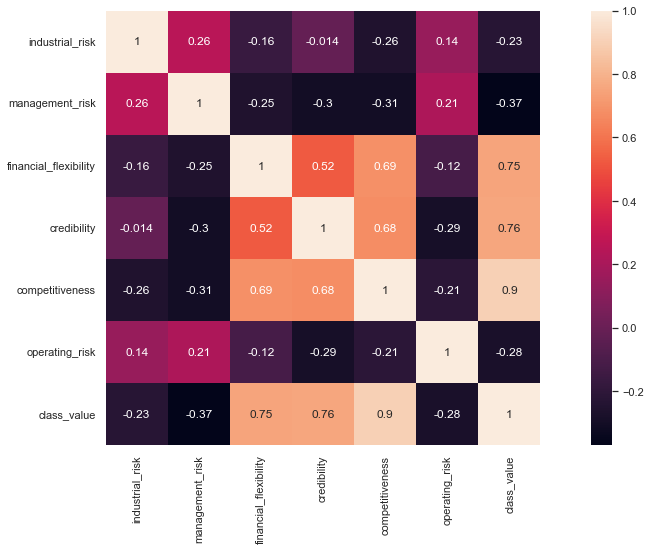

In [141]:
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

- __The Correlation values between most variables are not high and so its confusing to find the importance of variables in predicting classes.__
***

In [142]:
features=data1.columns[0:6]
features

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

### Calculating Non Parametric Rank Correlation to understand correlation b/w data on Discrete values of features.

### Spearmans Correlation

In [91]:
for feature in features:
    coef, p = spearmanr(data1[feature], data1.class_value)
    print("Correlation of %s"%feature, coef)

Correlation of industrial_risk -0.22947170756968077
Correlation of management_risk -0.37439127379904413
Correlation of financial_flexibility 0.7829528097863406
Correlation of credibility 0.7618550599211005
Correlation of competitiveness 0.9059986995626482
Correlation of operating_risk -0.278442572969297


### Kendall's Correlation

In [92]:
for feature in features:
    coef, p = kendalltau(data1[feature], data1.class_value)
    print("Correlation of %s"%feature, coef)

Correlation of industrial_risk -0.2163785912452097
Correlation of management_risk -0.35468549438782987
Correlation of financial_flexibility 0.7422101139825333
Correlation of credibility 0.7186345687862299
Correlation of competitiveness 0.8577141969809939
Correlation of operating_risk -0.2637672137089971


- __Kendall’s Rank Correlation is highly precise for Discrete Data than Spearman's Correlation.(Rank Based- Low, Medium, High)__<br>[click for reference link](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)
***

### Using Crosstab: <a id="6"></a>
- __We now use Crosstab from pandas to understand each feature with respect to Bankruptcy.__

In [93]:
data1.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class_value'],
      dtype='object')

In [94]:
pd.crosstab(data1.industrial_risk, data1.class_value)

class_value,0,1
industrial_risk,,
0.0,26,54
0.5,28,53
1.0,53,36


In [95]:
pd.crosstab(data1.industrial_risk, data1.class_value, normalize='index')

class_value,0,1
industrial_risk,,
0.0,0.325000,0.675000
0.5,0.345679,0.654321
1.0,0.595506,0.404494


In [96]:
pd.crosstab(data1.management_risk, data1.class_value, normalize='index')

class_value,0,1
management_risk,,
0.0,0.177419,0.822581
0.5,0.333333,0.666667
1.0,0.613445,0.386555


In [97]:
pd.crosstab(data1.financial_flexibility, data1.class_value)

class_value,0,1
financial_flexibility,,
0.0,102,17
0.5,4,70
1.0,1,56


In [98]:
pd.crosstab(data1.financial_flexibility, data1.class_value, normalize='index')

class_value,0,1
financial_flexibility,,
0.0,0.857143,0.142857
0.5,0.054054,0.945946
1.0,0.017544,0.982456


In [99]:
pd.crosstab(data1.credibility, data1.class_value, normalize='index')

class_value,0,1
credibility,,
0.0,0.925532,0.074468
0.5,0.220779,0.779221
1.0,0.037975,0.962025


In [100]:
pd.crosstab(data1.competitiveness, data1.class_value, normalize='index')

class_value,0,1
competitiveness,,
0.0,1.000000,0.000000
0.5,0.071429,0.928571
1.0,0.000000,1.000000


In [101]:
pd.crosstab(data1.operating_risk, data1.class_value, normalize='index')

class_value,0,1
operating_risk,,
0.0,0.240506,0.759494
0.5,0.421053,0.578947
1.0,0.561404,0.438596


In [102]:
pd.crosstab(data1.financial_flexibility, data1.competitiveness, normalize='index')

competitiveness,0.0,0.5,1.0
financial_flexibility,,,
0.0,0.823529,0.067227,0.109244
0.5,0.054054,0.432432,0.513514
1.0,0.017544,0.280702,0.701754


- __From the pandas.crosstab, we can see the relation between each features with the classes.__ 
- __And it is understood that all features contibute in determining the Bankruptcy.__ 
- __Also we notice that Financial flexibility, Credibility and Competitiveness does the most contribution to the Bankruptcy.__
***

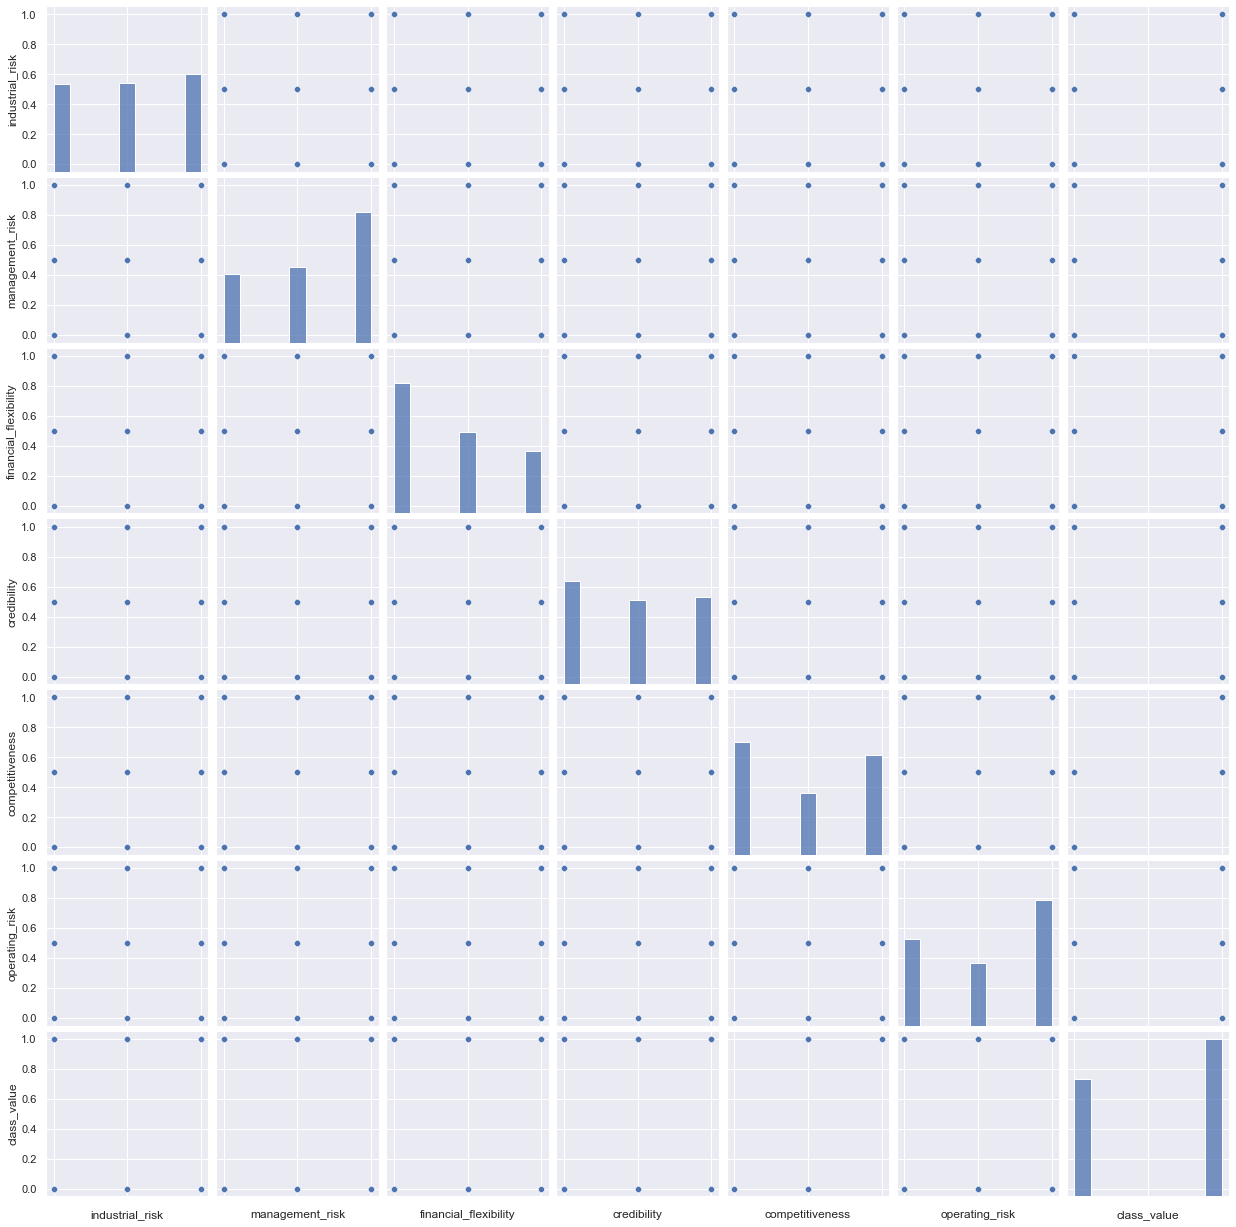

In [103]:
p=sns.pairplot(data1)
p.set(xticklabels=[])
plt.show()

- __Pairplot for this data has proven to be not useful because the data is not continuous. Lets explore a bit more on sns.__
***

### Distribution Plot <a id="4"></a>

C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


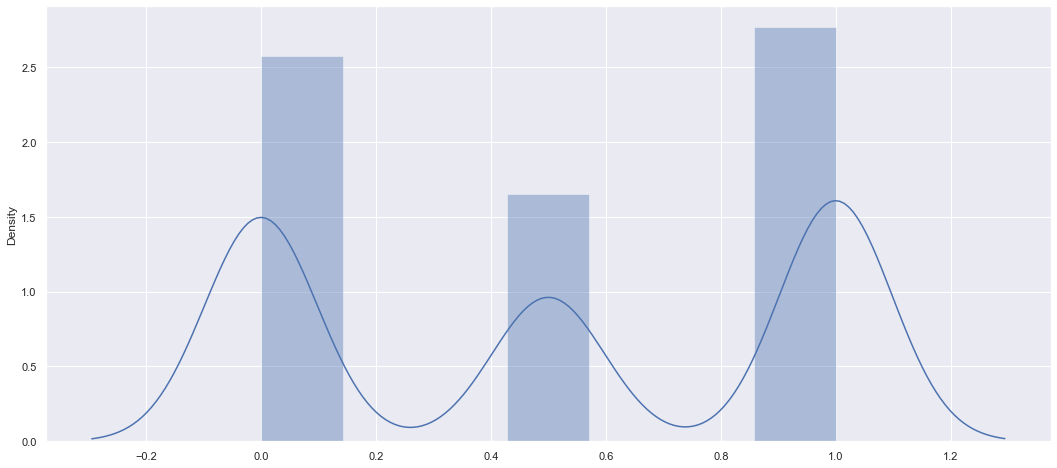

In [104]:
sns.set_theme();
ax = sns.distplot(data1)

#### Distribution of the dataset is understood through this plot.
***

### Basic Understanding with Line Plot <a id="5"></a>

<AxesSubplot:>

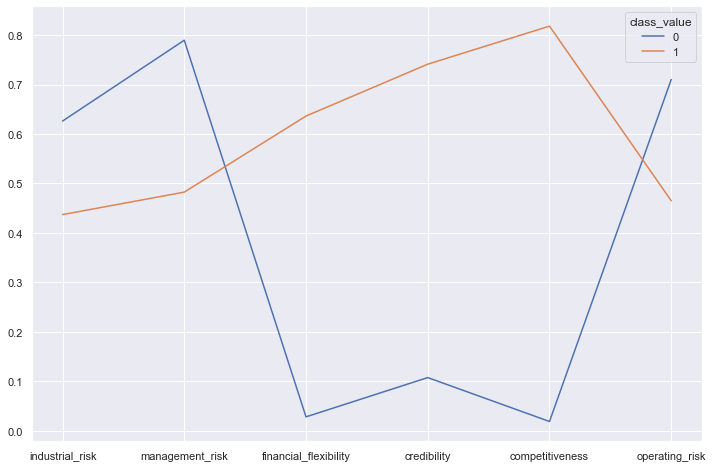

In [105]:
data1.groupby('class_value')[features].mean().T.plot(figsize=(12,8))

- __The above line graph analyzes the mean of feature values based on the 2 classes of bankruptcy. <br>You can see which features affect bankruptcy in what way.__
- __eg. From the given dataset, competitiveness gives bankrupt when its value is low and does not bankrupt when its values is high.__
***

### Violin and Strip Plot <a id="12"></a>

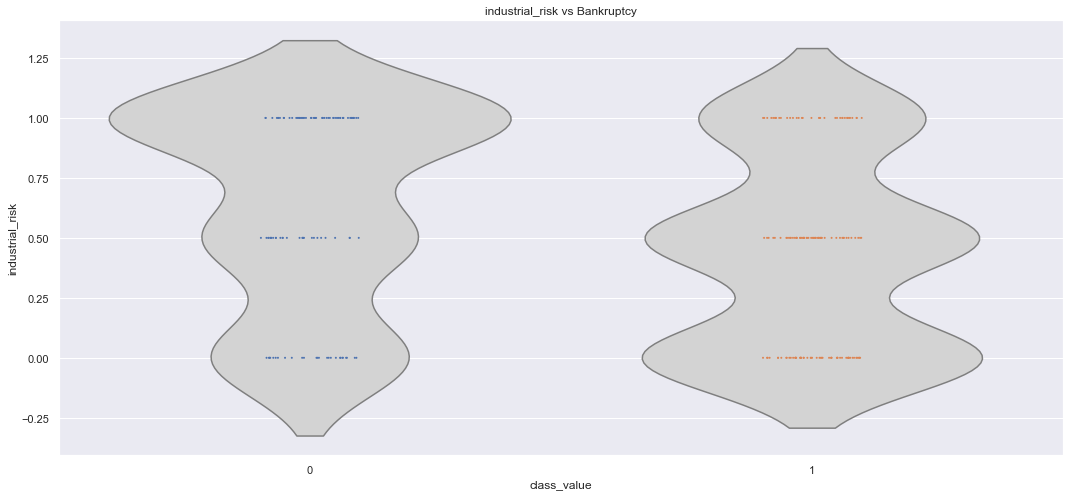

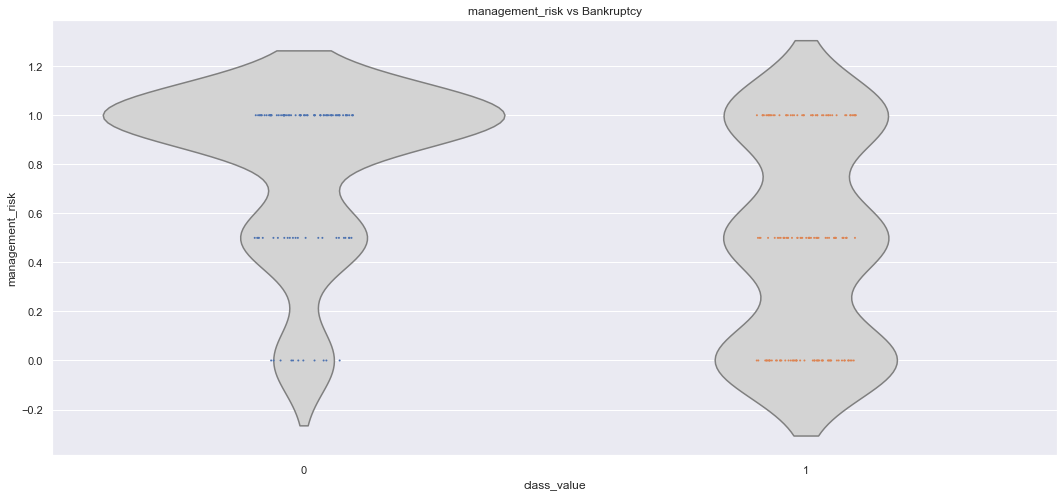

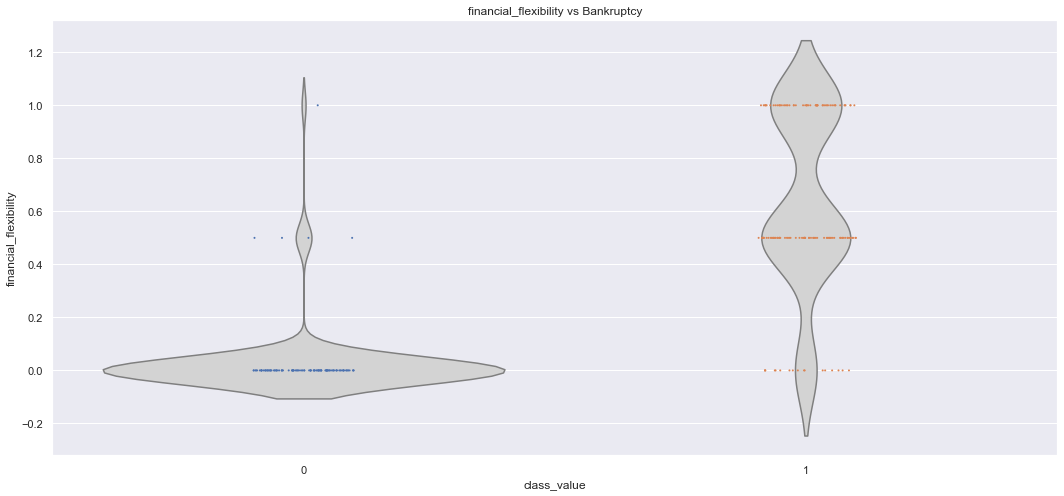

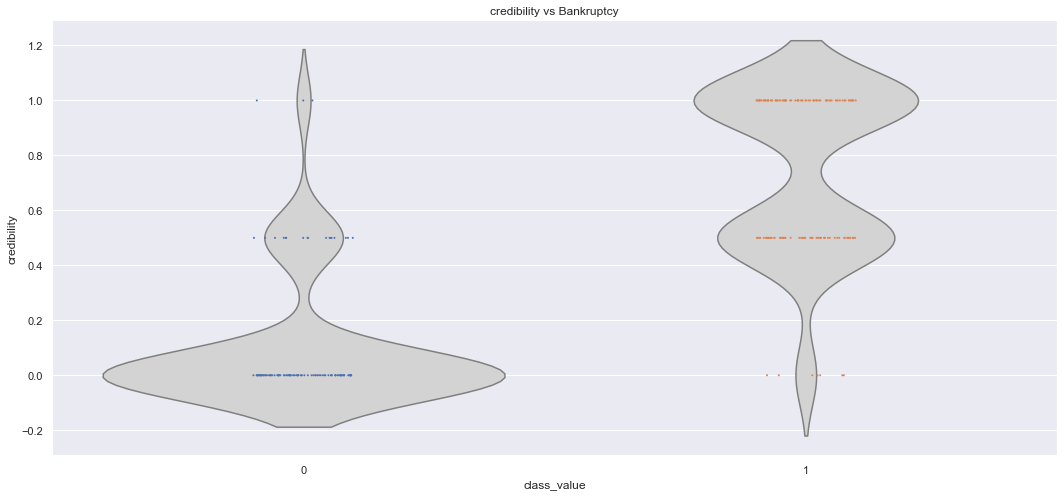

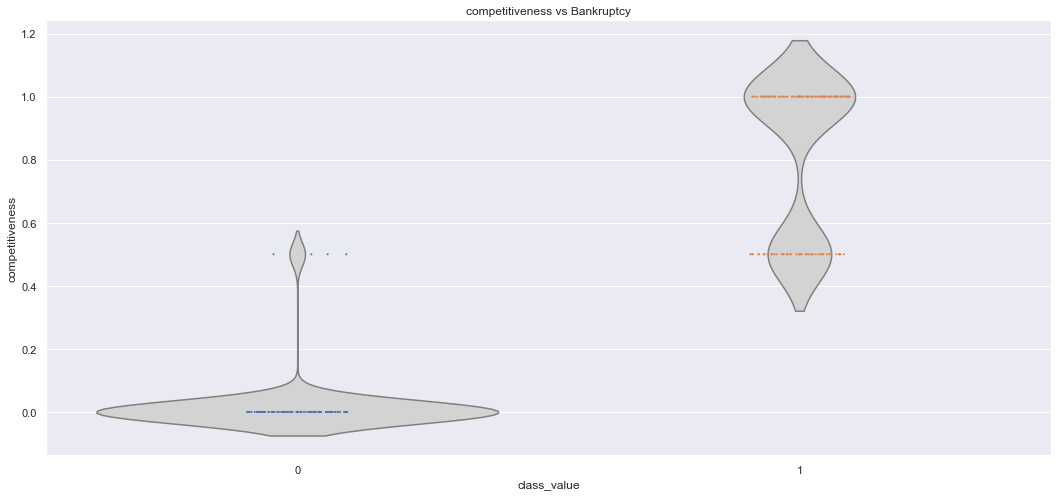

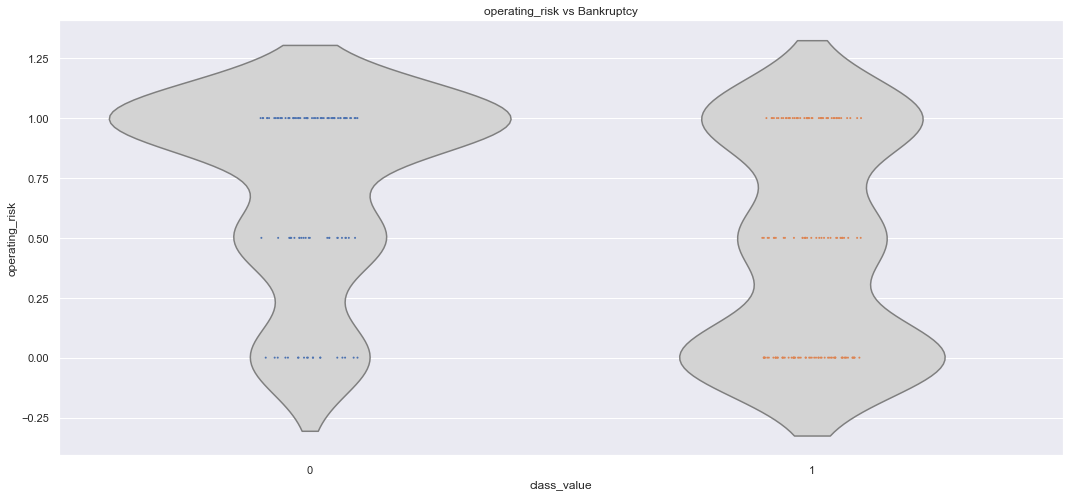

In [106]:
for feature in features:
    sns.violinplot(x='class_value', y=feature, data=data1, inner=None,color='lightgray')
    sns.stripplot(x='class_value', y=feature, data=data1, size=2,jitter=True)
    plt.ylabel(feature)
    plt.title("%s vs Bankruptcy"%feature)
    plt.show()

- __From above all violineplot & stripplot we can understand three feature(Financial Flexibility , Credibility and Competitiveness) are highly correlated with dependent variable.__
***

### Histogram plots <a id="7"></a>

In [107]:
data1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_value
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


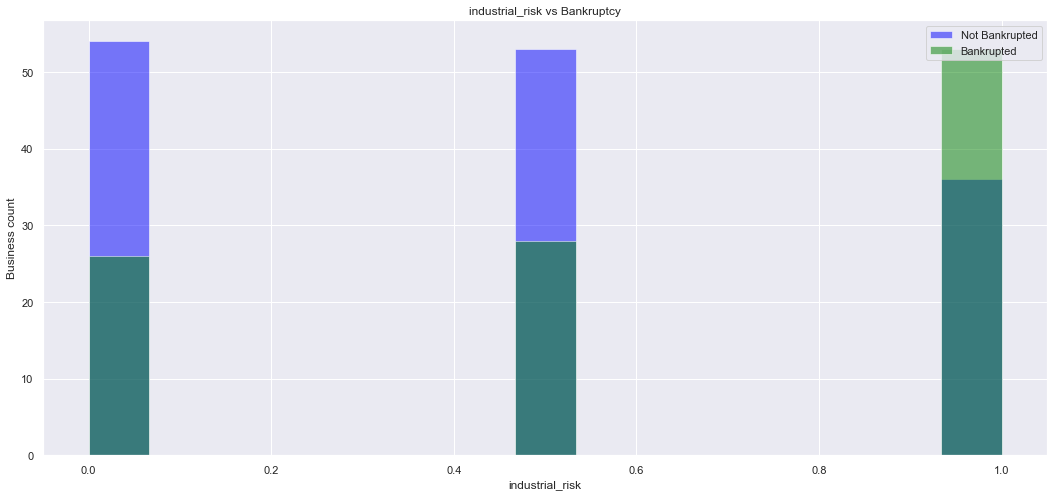

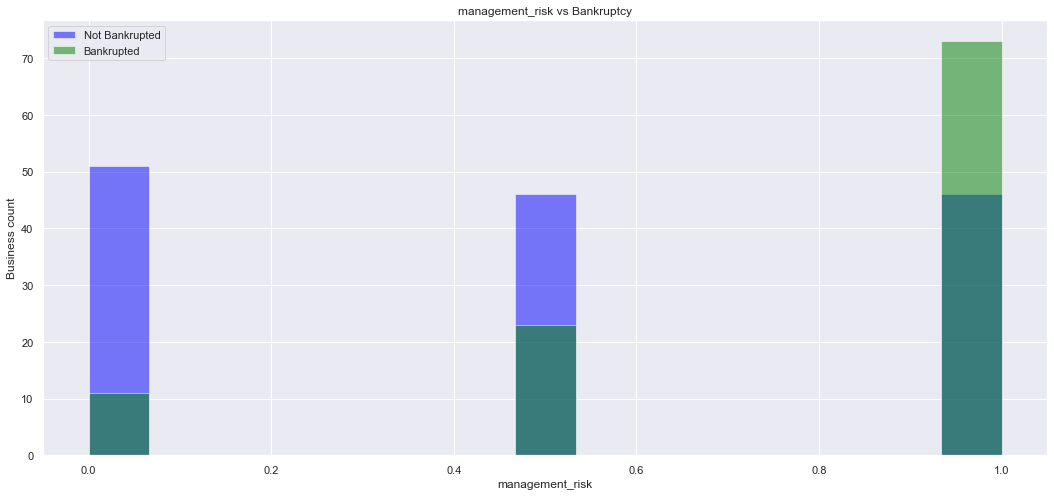

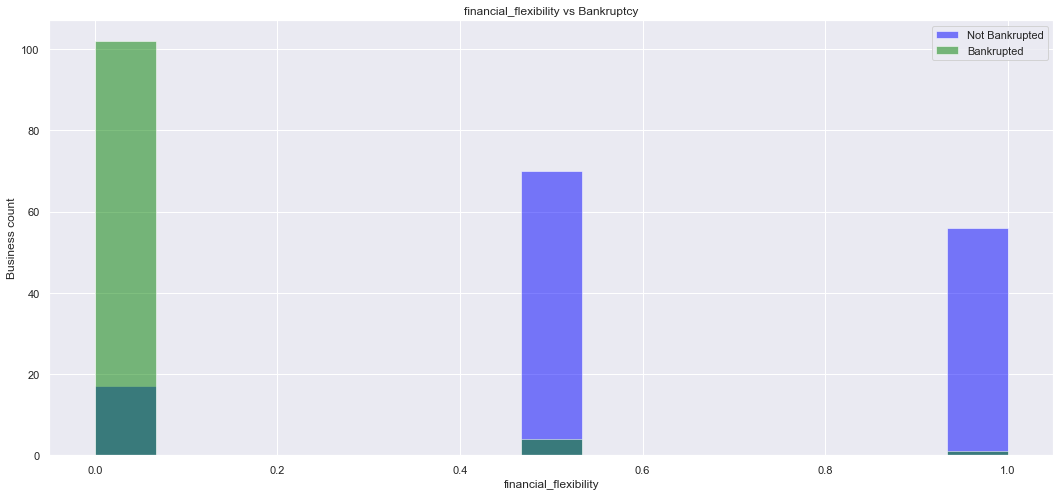

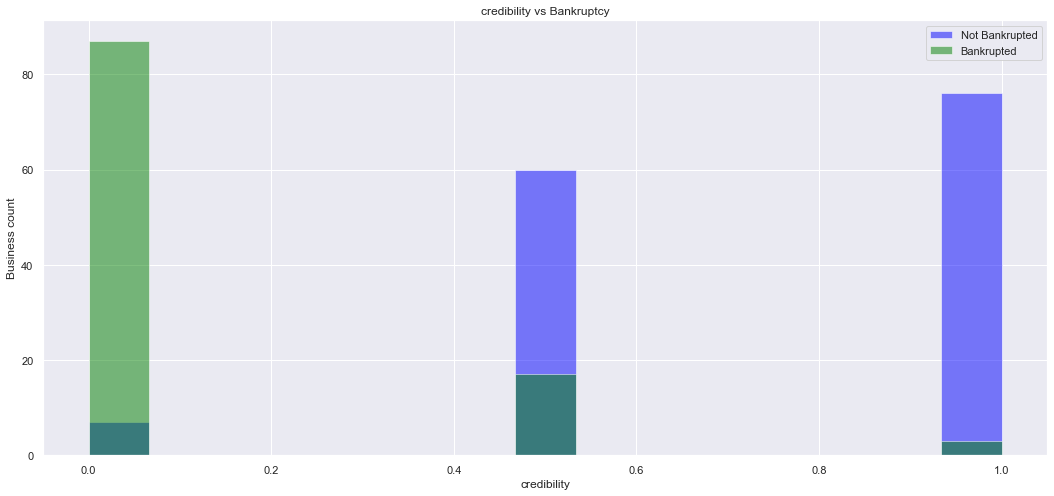

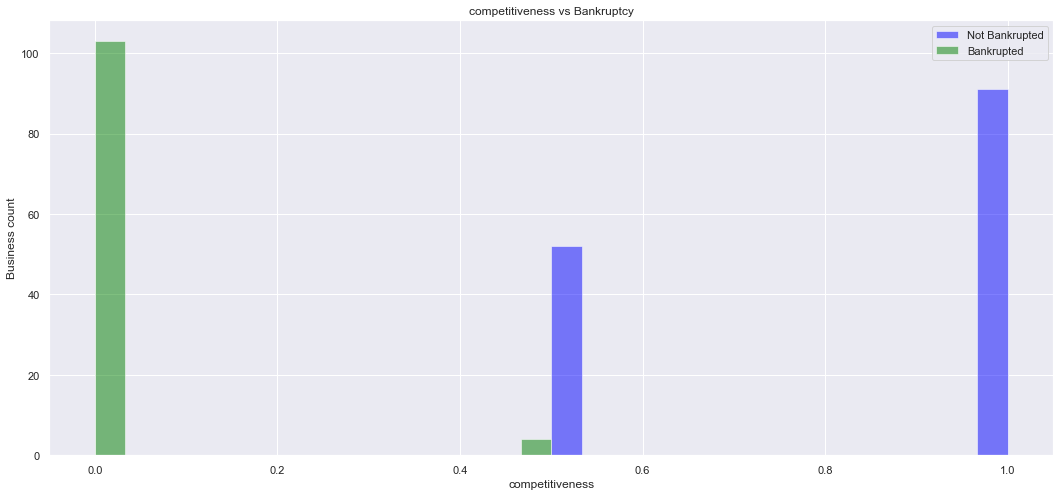

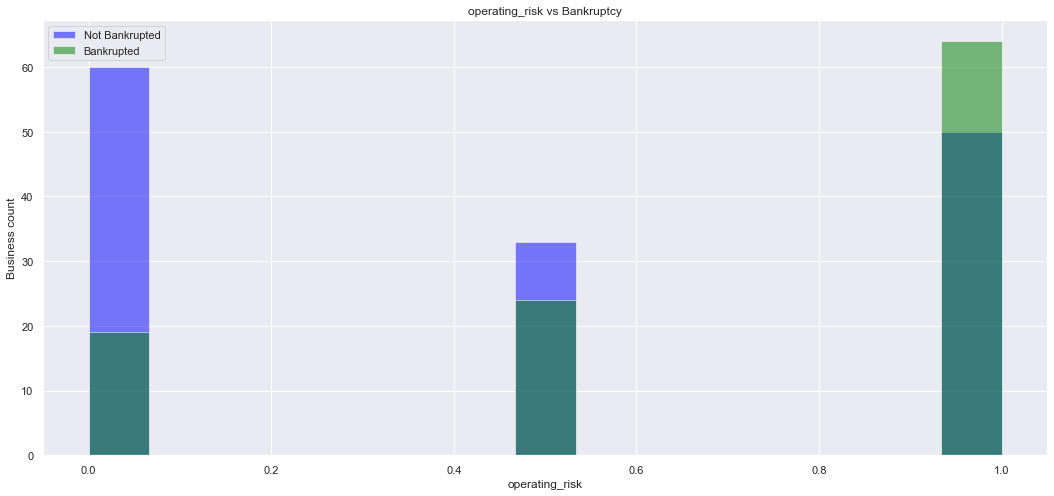

In [108]:
for feature in features:
    fig, ax = plt.subplots()

    ax.hist(data1[data1["class_value"]==1][feature], bins=15, alpha=0.5, color="blue", label="Not Bankrupted")
    ax.hist(data1[data1["class_value"]==0][feature], bins=15, alpha=0.5, color="green", label="Bankrupted")

    ax.set_xlabel(feature)
    ax.set_ylabel("Business count")
    ax.set_title("%s vs Bankruptcy"%feature)

    ax.legend();

- __The above bar graphs tells us the relation between each feature and the count of business with bankruptcy__
***

### Density Estimate Plots <a id="8"></a>

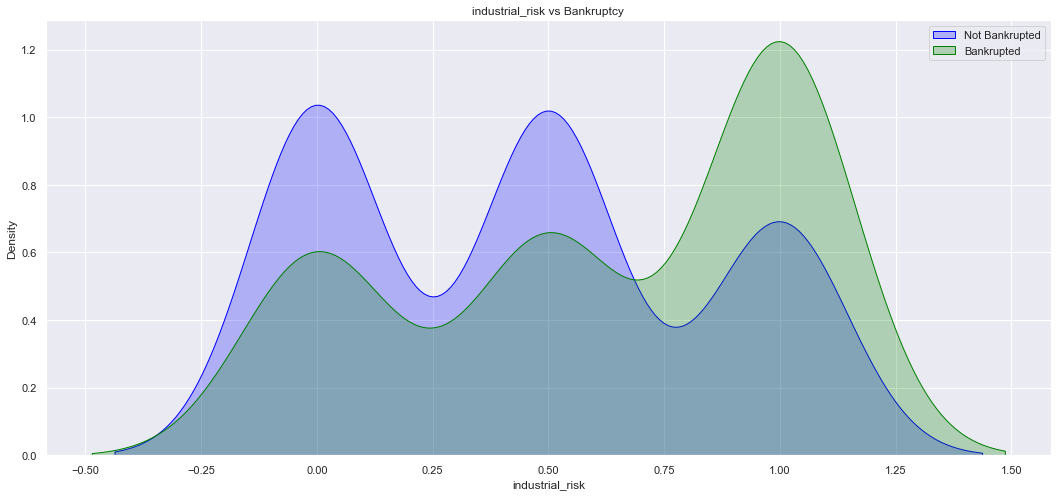

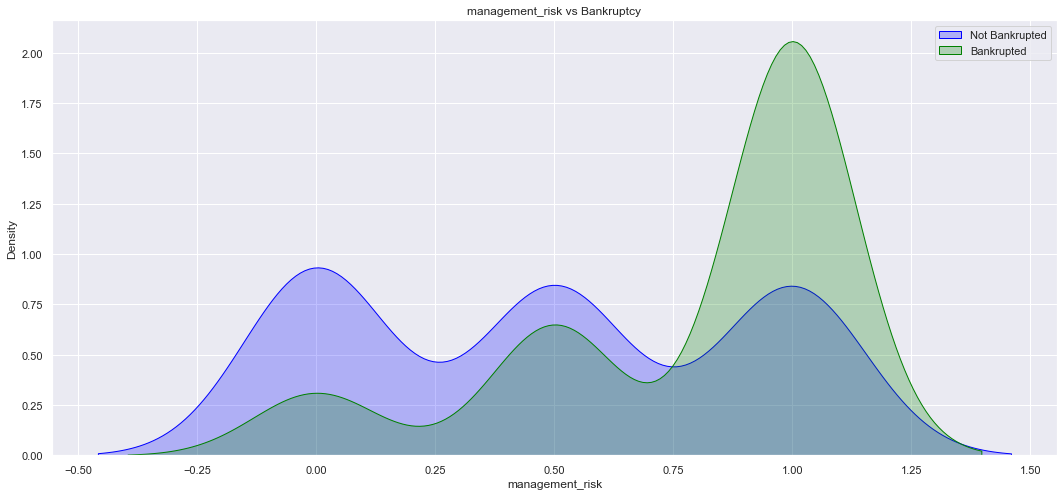

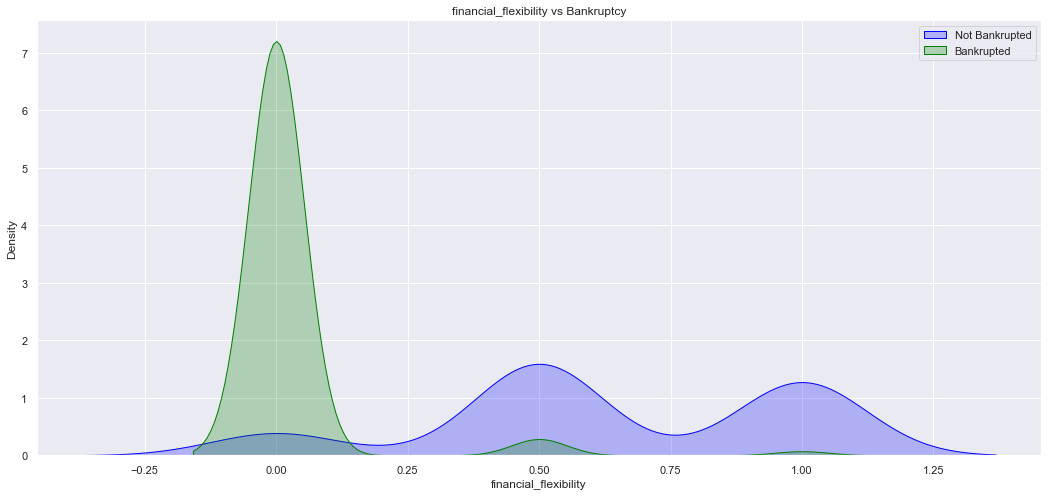

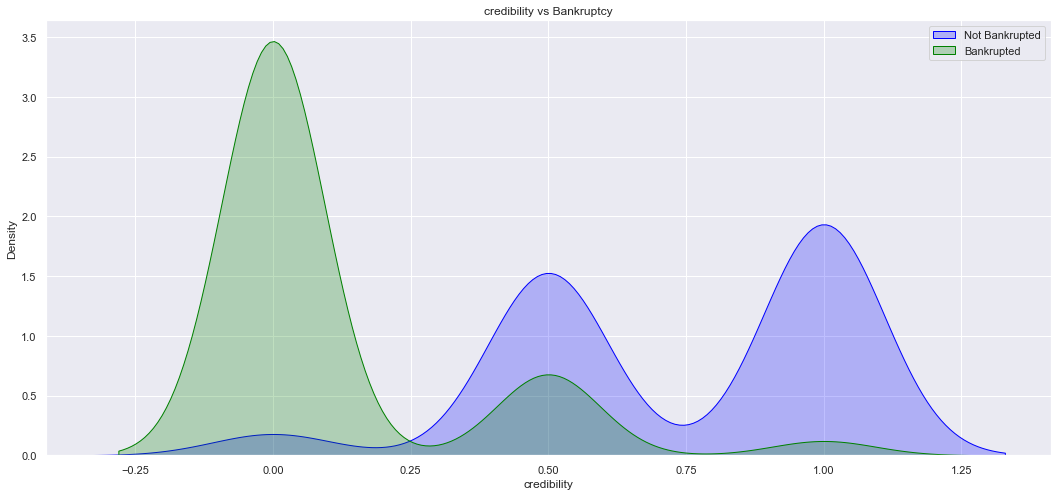

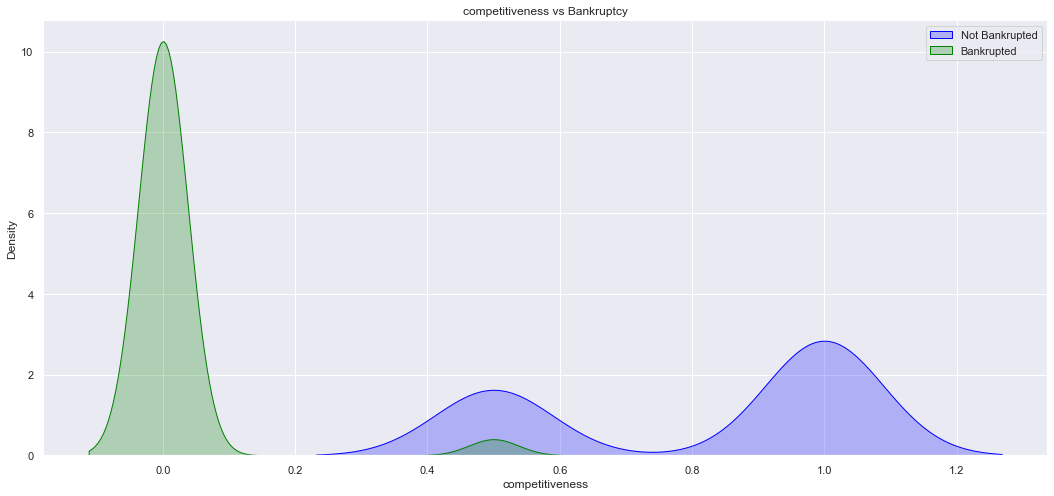

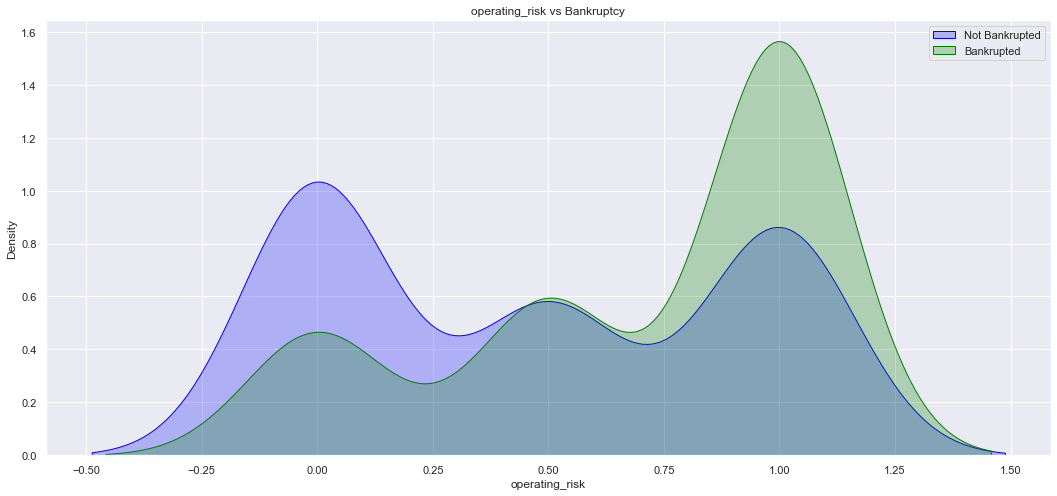

In [109]:
for feature in features:
    fig, ax = plt.subplots()

    sns.kdeplot(data1[data1["class_value"]==1][feature], shade=True, color="blue", label="Not Bankrupted", ax=ax)
    sns.kdeplot(data1[data1["class_value"]==0][feature], shade=True, color="green", label="Bankrupted", ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.set_title("%s vs Bankruptcy"%feature)
    #fig.suptitle("Financial Flexibility vs. Bankruptcy");
    ax.legend();

- __The above graphs show the density of Bankruptcy happening w.r.t different features. We can understand the spread of data with this graph i.e. Normal distribution.__
- __Also we can know from the peaks of a Density Plot where values are concentrated over the interval.__
- __We can also understand the distribution shape from the above plots.__

***

### Grouped Bar Charts using sns.catplot - Type 1 <a id="9"></a>

C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


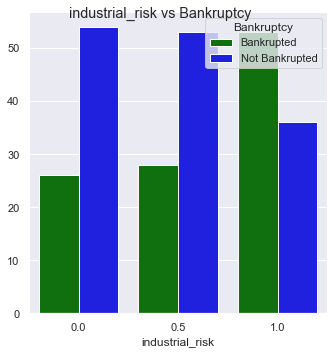

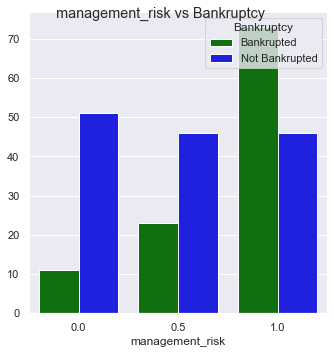

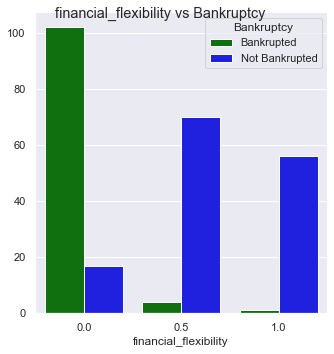

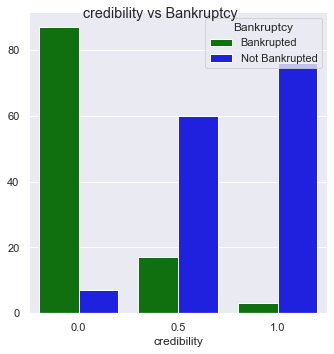

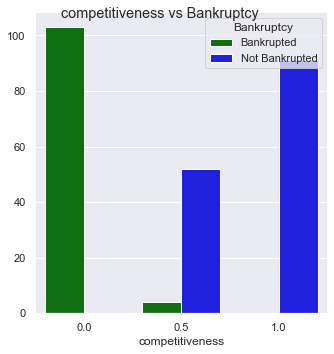

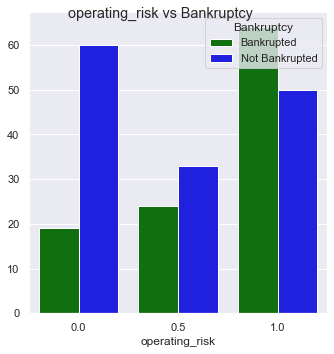

In [111]:
for feature in features:
    g=sns.catplot(feature, hue="class_value", data=data1, kind="count",legend = False,
            palette={1:"blue", 0:"green"})

    g.set_axis_labels(feature,"")
    plt.legend(title='Bankruptcy', loc='upper right', labels=['Bankrupted', 'Not Bankrupted'])
    #g.set_title("%s vs Bankruptcy"%feature)
    g.fig.suptitle("%s vs Bankruptcy"%feature);

- __The above graph is grouped based on bankruptcy along the features.__
- __Here we can look at both classes w.r.t features side by side and understand data better.__
***

### Grouped Bar Charts using sns.catplot - Type 2

C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\new\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


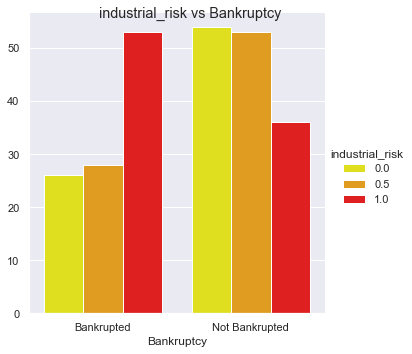

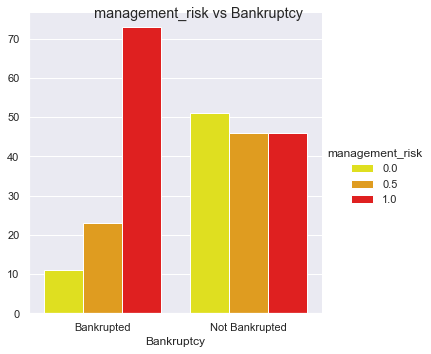

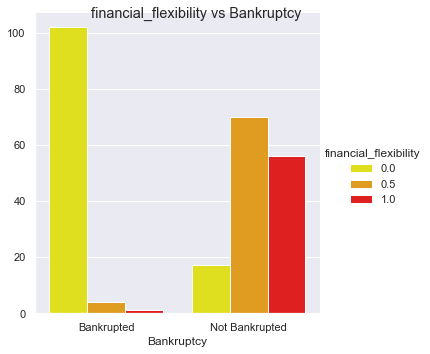

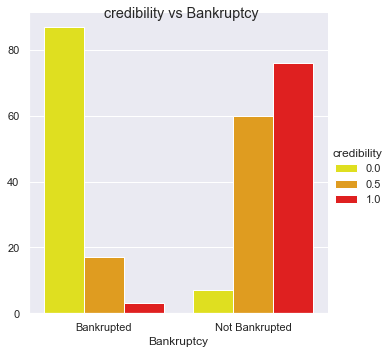

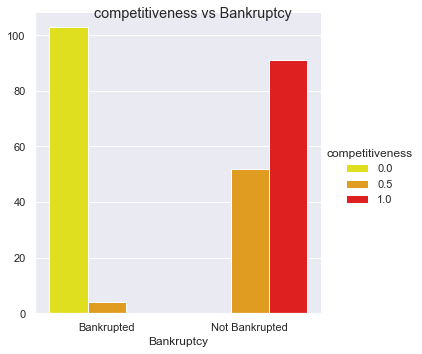

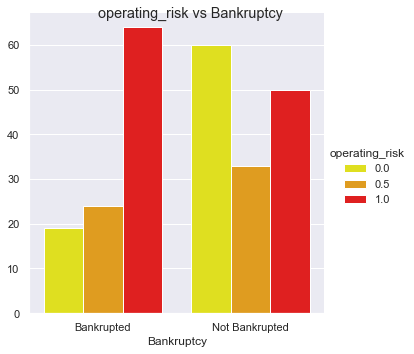

In [112]:
for feature in features:
    g=sns.catplot("class_value", hue=feature, data=data1, kind="count", 
            palette={0:"yellow", 0.5:"orange", 1:"red"})

    g.legend.set_title(feature)
    g.set_xticklabels(["Bankrupted", "Not Bankrupted"])
    g.set_axis_labels("Bankruptcy","")

    g.fig.suptitle("%s vs Bankruptcy"%feature);

- __The above graph is grouped based on features along with Bankruptcy.__
- __Here we can look at different feature values w.r.t Bankruptcy side by side and understand data better.__
***

### Stacked Bar Charts for checking proportion <a id="10"></a>

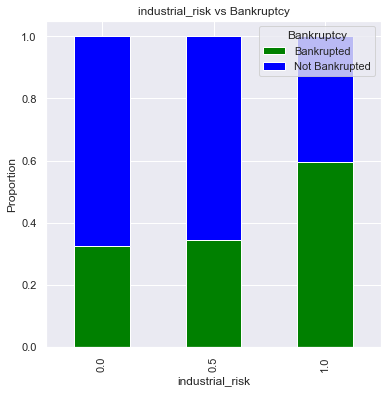

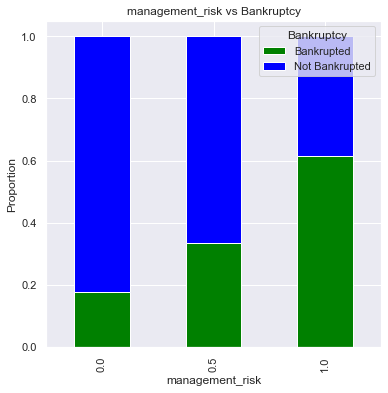

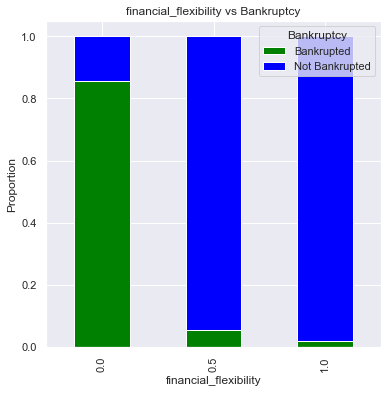

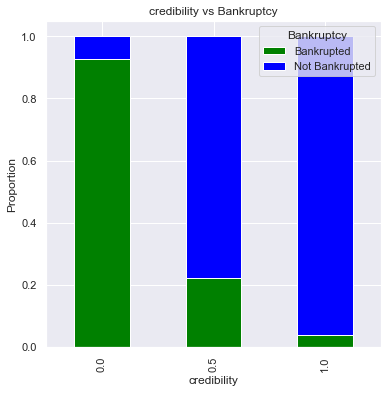

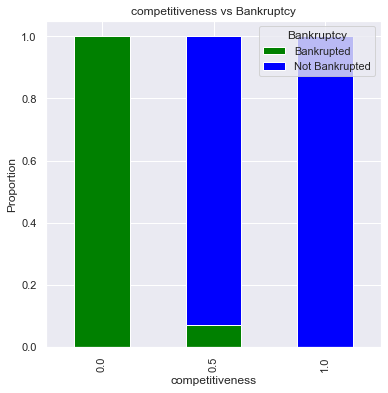

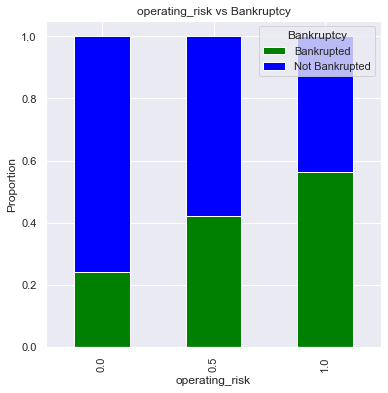

In [113]:
for feature in features:
    counts_df = data1.groupby([feature, "class_value"])["competitiveness"].count().unstack()
    Bankruptcy_df = counts_df.T.div(counts_df.T.sum()).T
    g=Bankruptcy_df.plot(kind="bar", stacked=True, color=["green", "blue"]).set(title="%s vs Bankruptcy"%feature)

    plt.gcf().set_size_inches(6,6)
    plt.legend(title='Bankruptcy', loc='upper right', labels=['Bankrupted', 'Not Bankrupted'])
    plt.xlabel(feature)
    plt.ylabel("Proportion")

- __The above graph shows the comparisions between the bankruptcy classes.__
- __We can see the proportion of classes w.r.t the discrete values of the features.__
***

## CONCLUSION FROM EDA PROCESS: <a id="11"></a>

- __From the basic pd.crosstab executions, we find that Financial Flexibility, Competitiveness and Credibility does the most contribution for the bankruptcy.__
- __From the Histograms, we can assume that Industrial Risk, Management Risk and Operating Risk have varied businessess(count) with varied Bankruptcy classes. These 3 feature surely impact a little for determining Bankruptcy.__
- __The Density Estimate plots give the distribuiton shape which is Normally Distributed.__
- __The grouped Bar charts(1&2) gives us the relation between features and Bankruptcy. We can declare Financial Flexibility, Competitiveness and Credibility are showing higher contribution to Bankruptcy.__
- __We can also assume that Industrial Risk, Management Risk and Operating Risk have some impact in determining Bankruptcy. Its still Unclear.__

[Go Home](#home)<br>
***

# Model Building <a id="Model"></a>

# CONTENTS <a id="contents"></a>
[1.Feature Engineering](#feature)<br>
[2.Artificial Neural Networks](#ann)<br>
[3.ANN Libraries](#libraries)<br>
[4.Hyperparameter Tuning](#keras)<br>
[5.Final Model](#final)<br>
[6.Evaluation](#eval)<br>

#### Importing Libraries

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

#### Splitting Data as features and target for Test and Train set

In [40]:
X=data1.iloc[:,0:6]
Y=data1["class_value"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=123,test_size=0.30)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(175, 6)
(75, 6)
(175,)
(75,)


### Feature Engineering <a id="feature"></a>

In [42]:
selector = SelectFromModel(estimator = RandomForestClassifier(n_estimators=20,random_state=0,n_jobs=-1))
selector.fit(X_train,Y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1,
                                                 random_state=0))

In [43]:
selector.get_support()

array([False, False,  True, False,  True, False])

In [44]:
features = X_train.columns[selector.get_support()]
features

Index(['financial_flexibility', 'competitiveness'], dtype='object')

- __We can conclude that financial flexibililty,credibility and competitiveness are the most important features to predict bankruptcy.__
***

### CHI square analysis 

In [45]:
X = data1.iloc[:,[0,1,2,3,4,5]]
Y = data1.iloc[:,[6]]
# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
# summarize scores
#set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[ 4.22529844  9.40719007 60.23724218 52.30725081 82.1862519   6.4581291 ]


- __what we infer in chi square is there are three feature are getting high score ,mean while it has high valuable information in three feature.__
- __We can conclude that financial flexibililty,credibility and competitiveness are the most important features to predict bankruptcy.__
***

## Artificial Neural Networks <a id="ann"></a>
- Artificial neural networks (ANNs) are comprised of node layers- containing an input layer, one or more hidden layers, and an output layer.<br>
- Each Node is connected to another node from the next hidden layers and has associated weights and threshold. Each node is activated if the threshold is met. Otherwise Data is not passed.<br>
- Neural networks rely on training data to learn and improve their accuracy over time.  <br>
- With proper fine tuning, these models can give high accuracy on many problems to classify or cluster data at high velocity.

<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png" alt="Deep Neural Network Structure" style="width: 600px;"/>

***

### Neural Network libraries <a id="libraries"></a>

In [60]:
#neural network libraries
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.activations import relu, sigmoid
from tensorflow.keras import layers
from keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
#Evaluation libraries
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score as ac
from sklearn.model_selection import cross_val_score
import h5py
from tensorflow.keras.models import load_model

#### Standardizing features:

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Hyperparameters in ANN - Used to Fine tune a model for high accuracy<br> Keras Tuner is used. <a id="keras"></a>
   
   1. How many number of hidden layers we should have? - We used 2 to 20 layers.
   2. How many number of neurons we should have in hidden layers? - We used 32 to 512 neurons.
   3. Learning Rate - We used 1e-2, 1e-3, 1e-4.
      
      Other Parameters used
   4. Loss function - Binary Cross Entropy
   5. Metric - Accuracy
   6. Activation function - Sigmoid for the Output layer and Relu for all other layers
   7. Optimizer - Adam
#### Important note: 
- We have already run the tuner to choose the best model, Dont need to run the Keras Tuner code again.<br> Go to Final code.

In [50]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=6,))
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [51]:
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Bankruptcy-Prevention')

INFO:tensorflow:Reloading Oracle from existing project project1\Bankruptcy-Prevention\oracle.json
INFO:tensorflow:Reloading Tuner from project1\Bankruptcy-Prevention\tuner0.json


##### We are tuning the model based on accuracy. 

In [ ]:
tuner.search_space_summary()


##### fitting the data by comparing with the validation set made.

In [ ]:
tuner.search(X_train_scaled, Y_train,
             epochs=10,
             validation_split=0.3)

In [ ]:
tuner.results_summary()

- __Here By Keras tuner Optimization, We have few best combinations of Hyperparameters leading to high Accuracy(100 percent in this case). Now we choose the best combination to make a final Neural Network for Model building.__


### Making the Final Model with the chosen hyperparameters <a id="final"></a>

In [51]:
classifier=Sequential()

In [52]:
classifier.add(Dropout(0.2,input_dim=6))
classifier.add(layers.Dense(units=224,kernel_initializer ='he_uniform',activation='relu',input_dim=6))
classifier.add(layers.Dense(units=224,kernel_initializer ='he_uniform',activation='relu'))
classifier.add(layers.Dense(units=384,kernel_initializer ='he_uniform',activation='relu'))
classifier.add(layers.Dense(units=1,kernel_initializer ='glorot_uniform',activation='sigmoid'))

- __Dropout is only used during the training of a model and is not used when evaluating the skill of the model.__

In [53]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense (Dense)               (None, 224)               1568      
                                                                 
 dense_1 (Dense)             (None, 224)               50400     
                                                                 
 dense_2 (Dense)             (None, 384)               86400     
                                                                 
 dense_3 (Dense)             (None, 1)                 385       
                                                                 
Total params: 138,753
Trainable params: 138,753
Non-trainable params: 0
_________________________________________________________________


In [54]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
model_final=classifier.fit(X_train_scaled, Y_train,
             epochs=100,batch_size=1,
             validation_split=0.3)

Epoch 1/100
122/122 [==============================] - 5s 22ms/step - loss: 0.1893 - accuracy: 0.9426 - val_loss: 0.0749 - val_accuracy: 1.0000
Epoch 2/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0798 - accuracy: 0.9836 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 3/100
122/122 [==============================] - 1s 5ms/step - loss: 0.1007 - accuracy: 0.9508 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 4/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 5/100
122/122 [==============================] - 1s 6ms/step - loss: 0.0687 - accuracy: 0.9672 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 6/100
122/122 [==============================] - 1s 6ms/step - loss: 0.0273 - accuracy: 0.9836 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7/100
122/122 [==============================] - 1s 6ms/step - loss: 0.0393 - accuracy: 0.9836 - val_loss: 0.0101 - val_accuracy: 1.000

Epoch 58/100
122/122 [==============================] - 1s 9ms/step - loss: 0.0195 - accuracy: 0.9918 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 59/100
122/122 [==============================] - 1s 6ms/step - loss: 0.0387 - accuracy: 0.9836 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 60/100
122/122 [==============================] - 1s 7ms/step - loss: 0.0178 - accuracy: 0.9918 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 61/100
122/122 [==============================] - 1s 7ms/step - loss: 0.0382 - accuracy: 0.9754 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 62/100
122/122 [==============================] - 1s 6ms/step - loss: 0.0282 - accuracy: 0.9836 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 63/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 64/100
122/122 [==============================] - 1s 5ms/step - loss: 0.0191 - accuracy: 0.9918 - val_loss: 0.0038 - val_accuracy:

##### For 100 epochs, We can notice that there is high training accuracy(99.18%) and validation accuracy of 100%
- From this we can tell that our model is performing very well.(Not Overfitted)
- Here we can notice that the validation split is a split from the X_train data. So, For predicting we use the test data(Unseen data) which is not affected by any data leakage thus preventing overfitting.¶ 

### Saving Model

In [61]:
classifier.save(r'C:\Users\new\Documents\PythonFiles\bankr.h5')
print("Saved model to disk")

Saved model to disk


### Prediction and Confusion Matrix and AUC ROC Curve <a id="eval"></a>

In [62]:
pred_y=classifier.predict(X_test)

In [63]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ROC_AUC Score :  0.9956011730205279
Function for ROC_AUC Score :  0.9956011730205279
Threshold value is: 0.9995045


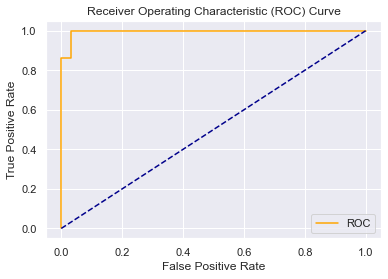

In [64]:
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(Y_test, pred_y)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(Y_test, pred_y))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### This is a very good ROC Curve meaning that we can perfectly distinguish between Bankrupted and Not Bankrupted.

In [65]:
y_pred = (pred_y >= 0.9995045) #optimal threshold is 0.9995045
y_pred=1*y_pred 

In [67]:
cm = confusion_matrix(Y_test, y_pred)
score=ac(y_pred,Y_test)

In [68]:
print("Confusion Matrix: \n",cm,"\n Test Accuracy Score: ", score,"\n\n")
print(classification_report(Y_test,y_pred))

Confusion Matrix: 
 [[30  1]
 [ 0 44]] 
 Test Accuracy Score:  0.9866666666666667 


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        44

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



#### From the confusion matrix and report, We can see that 1 of the data is misclassified. But Still we can say that our model is performing very good on Unseen data.
- __Train Accuracy : 99.18%__
- __Test Accuracy : 98.66%__

### Graphical representation of Accuracy and loss w.r.t no. of Epochs.

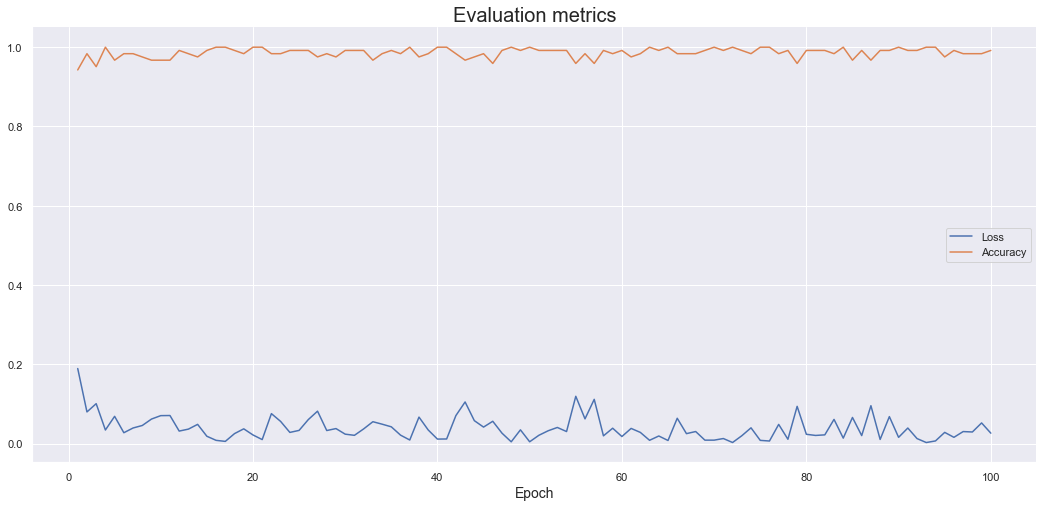

In [69]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 101), 
    model_final.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    model_final.history['accuracy'], label='Accuracy'
)

plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

- __From Graph, we can see the increase in accuracy and decrease in loss w.r.t epochs.__ 

### Insights

>### Artificial Neural Network

- Since all the graphs and results shows high accuracy, thus we can conclude that our ANN model is performing perfectly with very high accuracy and not Overfitted.

[Get back to Contents](#Model)<br> [Go Home](#home)<br>

## Deployment of the Project <a id="deploy"></a>

- __The model has been developed using the Streamlit library.__
- __Then it has been deployed onto web using the Heroku platform.(Running Successfully)__
- __Heroku link:[click for reference link](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)

In [143]:
%%writefile C:\Users\new\prev.py
    
#Importing Libraries:
import streamlit as st 
from keras.models import load_model
from PIL import Image
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
#-------------------------------------------------------------------------------------------------------------------------------
st.set_page_config(page_title="App-Streamlit",page_icon="random",layout="wide",
                       menu_items={'Get Help': 'http://www.quickmeme.com/img/54/547621773e22705fcfa0e73bc86c76a05d4c0b33040fcb048375dfe9167d8ffc.jpg',
                                   'Report a bug': "https://w7.pngwing.com/pngs/839/902/png-transparent-ladybird-ladybird-bug-miscellaneous-presentation-insects-thumbnail.png",
                                   'About': "# This is a Bankruptcy Prevention App. Very Easy to use!"})

@st.cache(allow_output_mutation=True) #For Autoupdate in app.

def loading_model():
    model = load_model(r'C:\Users\new\Documents\PythonFiles\bankr.h5')
    return model
with st.spinner('Model is being loaded..'):
    model=loading_model()     #Model is loaded.

# Reading File:
bank_data=pd.read_csv("A:\\Data Science by Excelr\\PROJECT\\bankruptcy_prevention.csv",sep=";")
label_encoder = preprocessing.LabelEncoder()
bank_data[" class"] = label_encoder.fit_transform(bank_data[" class"])
features=bank_data.columns[0:6]
#-------------------------------------------------------------------------------------------------------------------------------
st.write("""
         # BANKRUPTCY PREVENTION
         """)

# Model Prediction func:
def predict_bankruptcy(industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk):
    
    pred=model.predict([[industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk]])
    prediction = (pred >=0.9995045) 
    prediction=1*prediction
    print(prediction)
    return prediction
#-------------------------------------------------------------------------------------------------------------------------------

# Graph function:
def graph1(choice):
    plt.rcParams.update({'font.size': 6})
    if choice=='None':
        g=0
        h=0
        return g,h
    else:
        g=sns.catplot(" class", hue=choice, data=bank_data, kind="count",height=2,aspect=1.25, 
                          palette={0:"yellow", 0.5:"orange", 1:"red"})
        g.legend.set_title(choice, prop={"size":7})
        g.set_xticklabels(["Bankrupted", "Not Bankrupted"])
        g.fig.suptitle("%s vs Bankruptcy"%choice);
        plt.gcf().set_size_inches(3,3)
#--------------------            
        h=sns.catplot(choice, hue=" class", data=bank_data, kind="count",height=2,aspect=1.25,
                        palette={1:"blue", 0:"green"}) 
        h.legend.set_title("Bankruptcy", prop={"size":7}) 
        h.set_xticklabels(["Low", "Medium","High"]) 
        h.fig.suptitle("%s vs Bankruptcy"%choice);
        plt.gcf().set_size_inches(3,3)
        return g,h
            
#-------------------------------------------------------------------------------------------------------------------------------    

# Teams Func:
def team():
    st.text("Anand")
    st.text("Hari")
    st.text("Kasi")
    st.text("Nileena")
    st.text("Neha")
    st.text("Vishal")    
#-------------------------------------------------------------------------------------------------------------------------------

# Decor Func:    
def decor():
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Bankruptcy Prevention App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    image = Image.open('A:\prev.png')
    st.image(image, caption='')    
#--------------------------------------------------------------------------------------------------------------------------------

def main():
    
    decor()
    
# taking Inputs:
    check=st.checkbox("Input Values for Features",value=False)
    if check:
        industrial_risk = st.sidebar.number_input("Industrial Risk",min_value=0.0, max_value=1.0, value=0.0, step=0.5,help="low = 0.0, medium = 0.50, high = 1.0")
        management_risk = st.sidebar.number_input("Management Risk",min_value=0.0, max_value=1.0, value=0.0, step=0.5,help="low = 0.0, medium = 0.50, high = 1.0")
        financial_flexibility = st.sidebar.number_input("Financial Flexibility",min_value=0.0, max_value=1.0, value=0.0, step=0.5,help="low = 0.0, medium = 0.50, high = 1.0")
        credibility = st.sidebar.number_input("Credibility",min_value=0.0, max_value=1.0, value=0.0, step=0.5,help="low = 0.0, medium = 0.50, high = 1.0")
        competitiveness=st.sidebar.number_input("Competitiveness",min_value=0.0, max_value=1.0, value=0.0, step=0.5,help="low = 0.0, medium = 0.50, high = 1.0")
        operating_risk=st.sidebar.number_input("Operating Risk",min_value=0.0, max_value=1.0, value=0.0, step=0.5,help="low = 0.0, medium = 0.50, high = 1.0")
        
    #---------------------------------------------------------------------------------------------------------------------------

# Result:       
        result=""
        if st.button("Predict"):
            with st.spinner('Wait for it...'):
                time.sleep(3)
            result=predict_bankruptcy(industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk)
            
        if result==0:
            result='BANKRUPTED!!'
        elif result==1:
            st.balloons()
            result= 'NOT BANKRUPTED!!'
        else:
            result='yet to submit...'
        st.success("# You are {}".format(result))
    else:
        st.write("Whenever you're ready..!")
    #---------------------------------------------------------------------------------------------------------------------------
    
# Graph:    
    if st.checkbox("Show Graphs",value=False):
        choice = st.selectbox("Choose Feature Values :",
                     ('None','industrial_risk', ' management_risk', ' financial_flexibility',
                      ' credibility',' competitiveness',' operating_risk'))        
        
        col1,col2=st.columns(2)
        plot1,plot2=graph1(choice)
        if plot1!=0:
            with col1:
                st.pyplot(plot1)
            with col2:
                st.pyplot(plot2)
        else:
            st.write("No Feature chosen!")
#---------------------------------------------------------------------------------------------------------------------------
    
# Team Details:
    if st.button("Team Details"):
        team()
#-------------------------------------------------------------------------------------------------------------------------------

# Program Starts:
if __name__=='__main__':
    main()

Overwriting C:\Users\new\prev.py


[Go Home](#home)<br>